# Train Demand 

## Problem Definition
> Given users (casual and registered) for a train service, identify what features play important role in demand.

## Data
    The data is already pre-processed.
    1. All data are in numerical format.
    2. No missing values. (Assuming data available is for 1-19 of every month)
    3. Categorical data is already encoded in numerical format.
    

### Importing necessary tools

* pandas - For Data Analysis
* Matplotlib / Seaborn - For Data Visualization
    

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn  as sns
%matplotlib inline

In [38]:
# Importing the data
# Parsing date and specifying date columns as indexl_col so that we can resample it later
df = pd.read_csv("train.csv",parse_dates=["datetime"])
# Checking data type of columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1020.7 KB


In [39]:
# Checking is there is missing values
df.isna().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

There is no missing values and all data are already in numerical format.




## Feature Engineering

If we breakdown `datetime` into smaller part we can further analyze the data

In [40]:
### Make a copy of the original DataFrame
df_temp = df.copy()
df.shape,df_temp.shape

((10886, 12), (10886, 12))

In [41]:
df_temp["travel_year"]=df_temp.datetime.dt.year
df_temp['travel_month']=df_temp.datetime.dt.month
df_temp['travel_day']=df_temp.datetime.dt.day
df_temp['travel_day_of_week']=df_temp.datetime.dt.dayofweek
df_temp['travel_hour']=df_temp.datetime.dt.hour
df_temp.drop('datetime',axis=1,inplace=True)

# Making sure we have a valid dataset

df_temp.info(),df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   season              10886 non-null  int64  
 1   holiday             10886 non-null  int64  
 2   workingday          10886 non-null  int64  
 3   weather             10886 non-null  int64  
 4   temp                10886 non-null  float64
 5   atemp               10886 non-null  float64
 6   humidity            10886 non-null  int64  
 7   windspeed           10886 non-null  float64
 8   casual              10886 non-null  int64  
 9   registered          10886 non-null  int64  
 10  count               10886 non-null  int64  
 11  travel_year         10886 non-null  int64  
 12  travel_month        10886 non-null  int64  
 13  travel_day          10886 non-null  int64  
 14  travel_day_of_week  10886 non-null  int64  
 15  travel_hour         10886 non-null  int64  
dtypes: f

(None, None)

In [42]:
# Checking out the correlation matrix
df_temp.corr()


,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,travel_year,travel_month,travel_day,travel_day_of_week,travel_hour
season,1.000000,0.029368,-0.008126,0.008879,0.258689,0.264744,0.190610,-0.147121,0.096758,0.164011,0.163439,-0.004797,0.971524,0.001729,-0.010553,-0.006546
holiday,0.029368,1.000000,-0.250491,-0.007074,0.000295,-0.005215,0.001929,0.008409,0.043799,-0.020956,-0.005393,0.012021,0.001731,-0.015877,-0.191832,-0.000354
workingday,-0.008126,-0.250491,1.000000,0.033772,0.029966,0.024660,-0.010880,0.013373,-0.319111,0.119460,0.011594,-0.002482,-0.003394,0.009829,-0.704267,0.002780
weather,0.008879,-0.007074,0.033772,1.000000,-0.055035,-0.055376,0.406244,0.007261,-0.135918,-0.109340,-0.128655,-0.012548,0.012144,-0.007890,-0.047692,-0.022740
temp,0.258689,0.000295,0.029966,-0.055035,1.000000,0.984948,-0.064949,-0.017852,0.467097,0.318571,0.394454,0.061226,0.257589,0.015551,-0.038466,0.145430
atemp,0.264744,-0.005215,0.024660,-0.055376,0.984948,1.000000,-0.043536,-0.057473,0.462067,0.314635,0.389784,0.058540,0.264173,0.011866,-0.040235,0.140343
humidity,0.190610,0.001929,-0.010880,0.406244,-0.064949,-0.043536,1.000000,-0.318607,-0.348187,-0.265458,-0.317371,-0.078606,0.204537,-0.011335,-0.026507,-0.278011
windspeed,-0.147121,0.008409,0.013373,0.007261,-0.017852,-0.057473,-0.318607,1.000000,0.092276,0.091052,0.101369,-0.015221,-0.150192,0.036157,-0.024804,0.146631
casual,0.096758,0.043799,-0.319111,-0.135918,0.467097,0.462067,-0.348187,0.092276,1.000000,0.497250,0.690414,0.145241,0.092722,0.014109,0.246959,0.302045
registered,0.164011,-0.020956,0.119460,-0.109340,0.318571,0.314635,-0.265458,0.091052,0.497250,1.000000,0.970948,0.264265,0.169451,0.019111,-0.084427,0.380540


<AxesSubplot:>

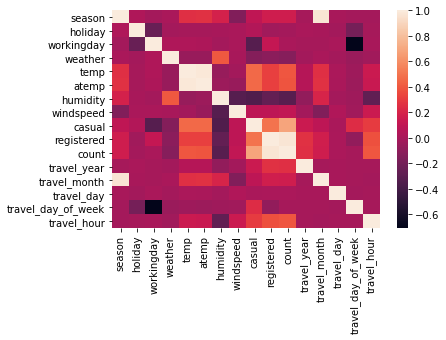

In [43]:
# Visualizing the corr matrix
sns.heatmap(df_temp.corr(),annot=False)

### Looking at data at different time to identify trends

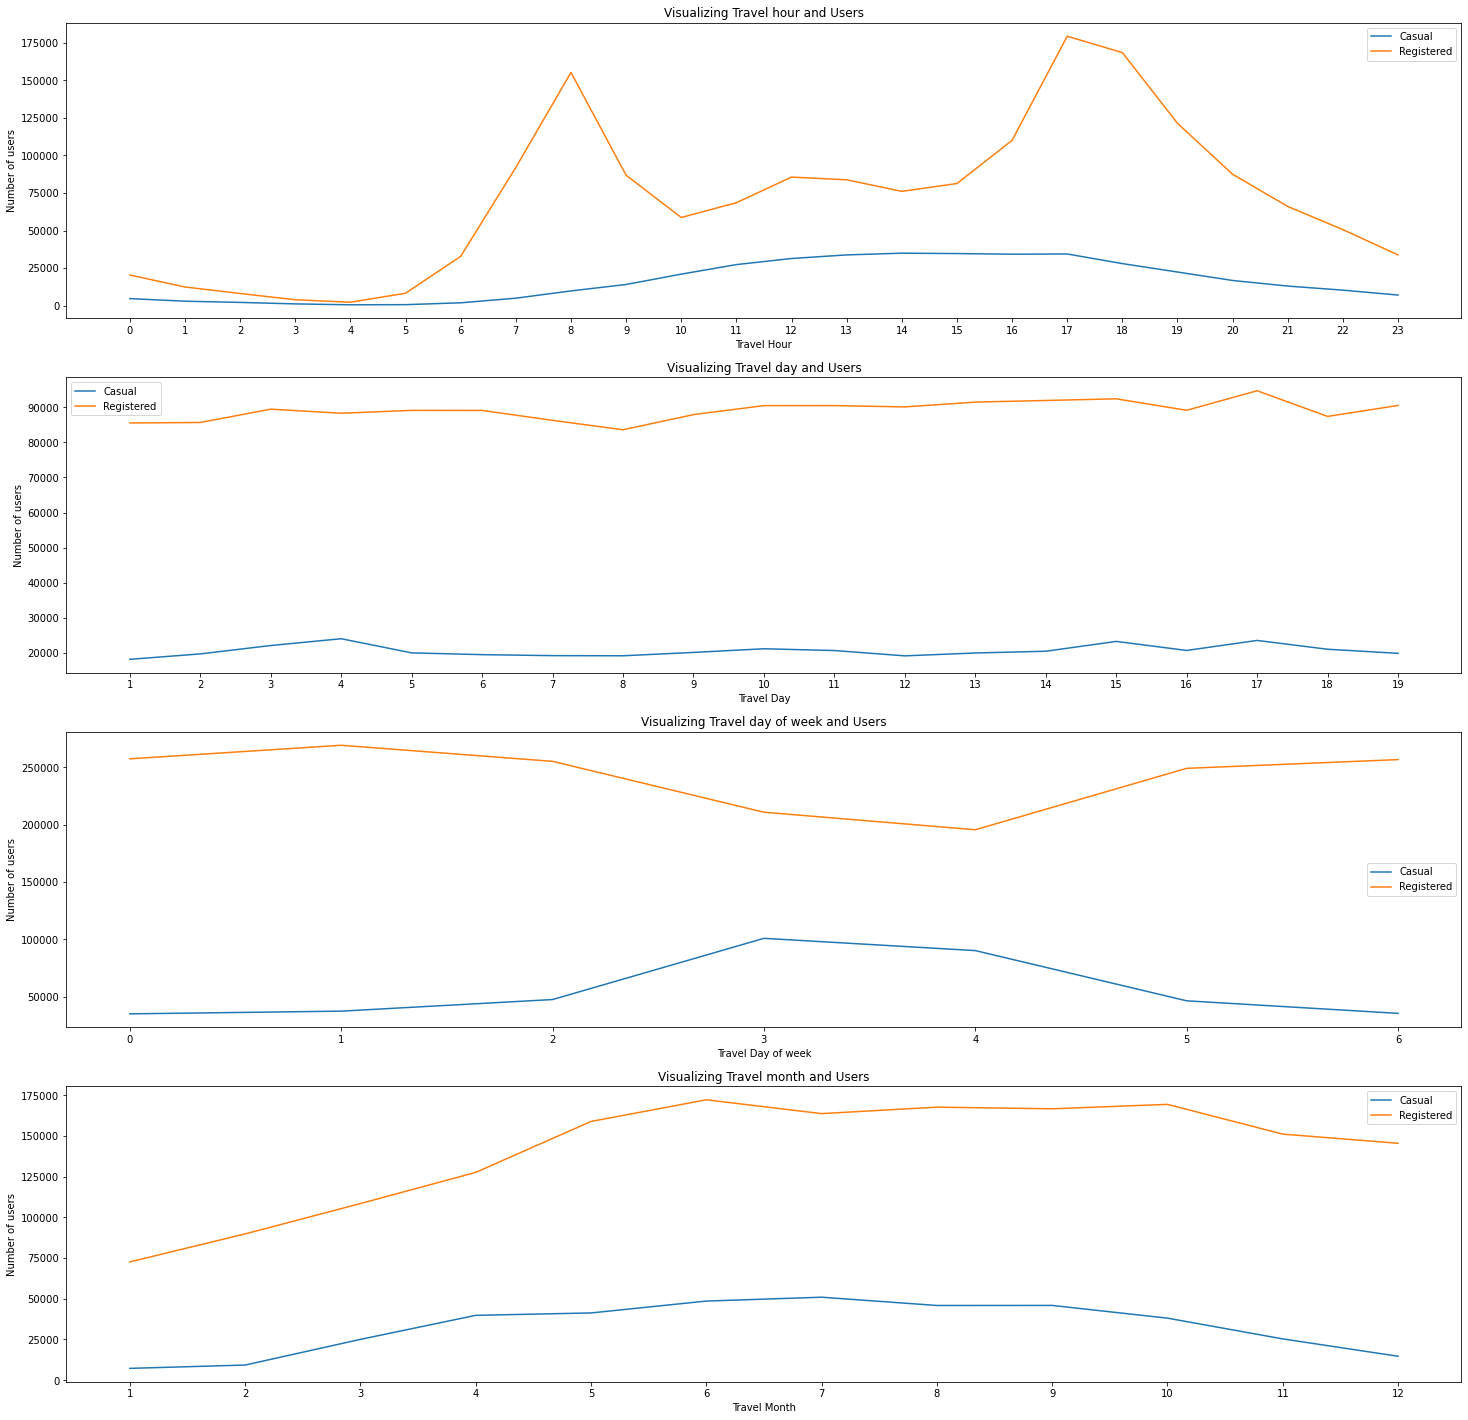

In [44]:
fig , ax = plt.subplots(4,1,figsize=(25,25))

# Visualizing Travel Hour and Users travelled

sns.lineplot(ax=ax[0],y=df_temp.groupby(["travel_hour"])["casual"].sum(),x=df_temp.travel_hour,markers=True)
sns.lineplot(ax=ax[0],y=df_temp.groupby(["travel_hour"])["registered"].sum(),x=df_temp.travel_hour,markers=True)
ax[0].set_title("Visualizing Travel hour and Users")
ax[0].legend(["Casual","Registered"])
ax[0].set_xticks(df_temp.travel_hour.unique())
ax[0].set_ylabel("Number of users")
ax[0].set_xlabel("Travel Hour")

# Visualizing Travel Day and Users travelled

sns.lineplot(ax=ax[1],y=df_temp.groupby(["travel_day"])["casual"].sum(),x=df_temp.travel_day.unique())
sns.lineplot(ax=ax[1],y=df_temp.groupby(["travel_day"])["registered"].sum(),x=df_temp.travel_day.unique())
ax[1].set_title("Visualizing Travel day and Users")
ax[1].legend(["Casual","Registered"])
ax[1].set_xticks(df_temp.travel_day.unique())
ax[1].set_ylabel("Number of users")
ax[1].set_xlabel("Travel Day")

# Visualizing Travel Day of week and Users travelled

sns.lineplot(ax=ax[2],y=df_temp.groupby(["travel_day_of_week"])["casual"].sum(),x=df_temp.travel_day_of_week.unique())
sns.lineplot(ax=ax[2],y=df_temp.groupby(["travel_day_of_week"])["registered"].sum(),x=df_temp.travel_day_of_week.unique())
ax[2].set_title("Visualizing Travel day of week and Users")
ax[2].legend(["Casual","Registered"])
ax[2].set_xticks(df_temp.travel_day_of_week.unique())
ax[2].set_ylabel("Number of users")
ax[2].set_xlabel("Travel Day of week")

# Visualizing Travel Month and Users travelled

sns.lineplot(ax=ax[3],y=df_temp.groupby(["travel_month"])["casual"].sum(),x=df_temp.travel_month.unique())
sns.lineplot(ax=ax[3],y=df_temp.groupby(["travel_month"])["registered"].sum(),x=df_temp.travel_month.unique())
ax[3].set_title("Visualizing Travel month and Users")
ax[3].legend(["Casual","Registered"])
ax[3].set_xticks(df_temp.travel_month.unique())
ax[3].set_ylabel("Number of users")
ax[3].set_xlabel("Travel Month")
ax[3].set_xticks(range(1,13))

> Looking at the above charts, most registered users travel before and after office hours( Before 9 and after 17), which can help to assume that most registered users are Professional / Students. Let's look at the data from yearly comparison to identify further trends. 


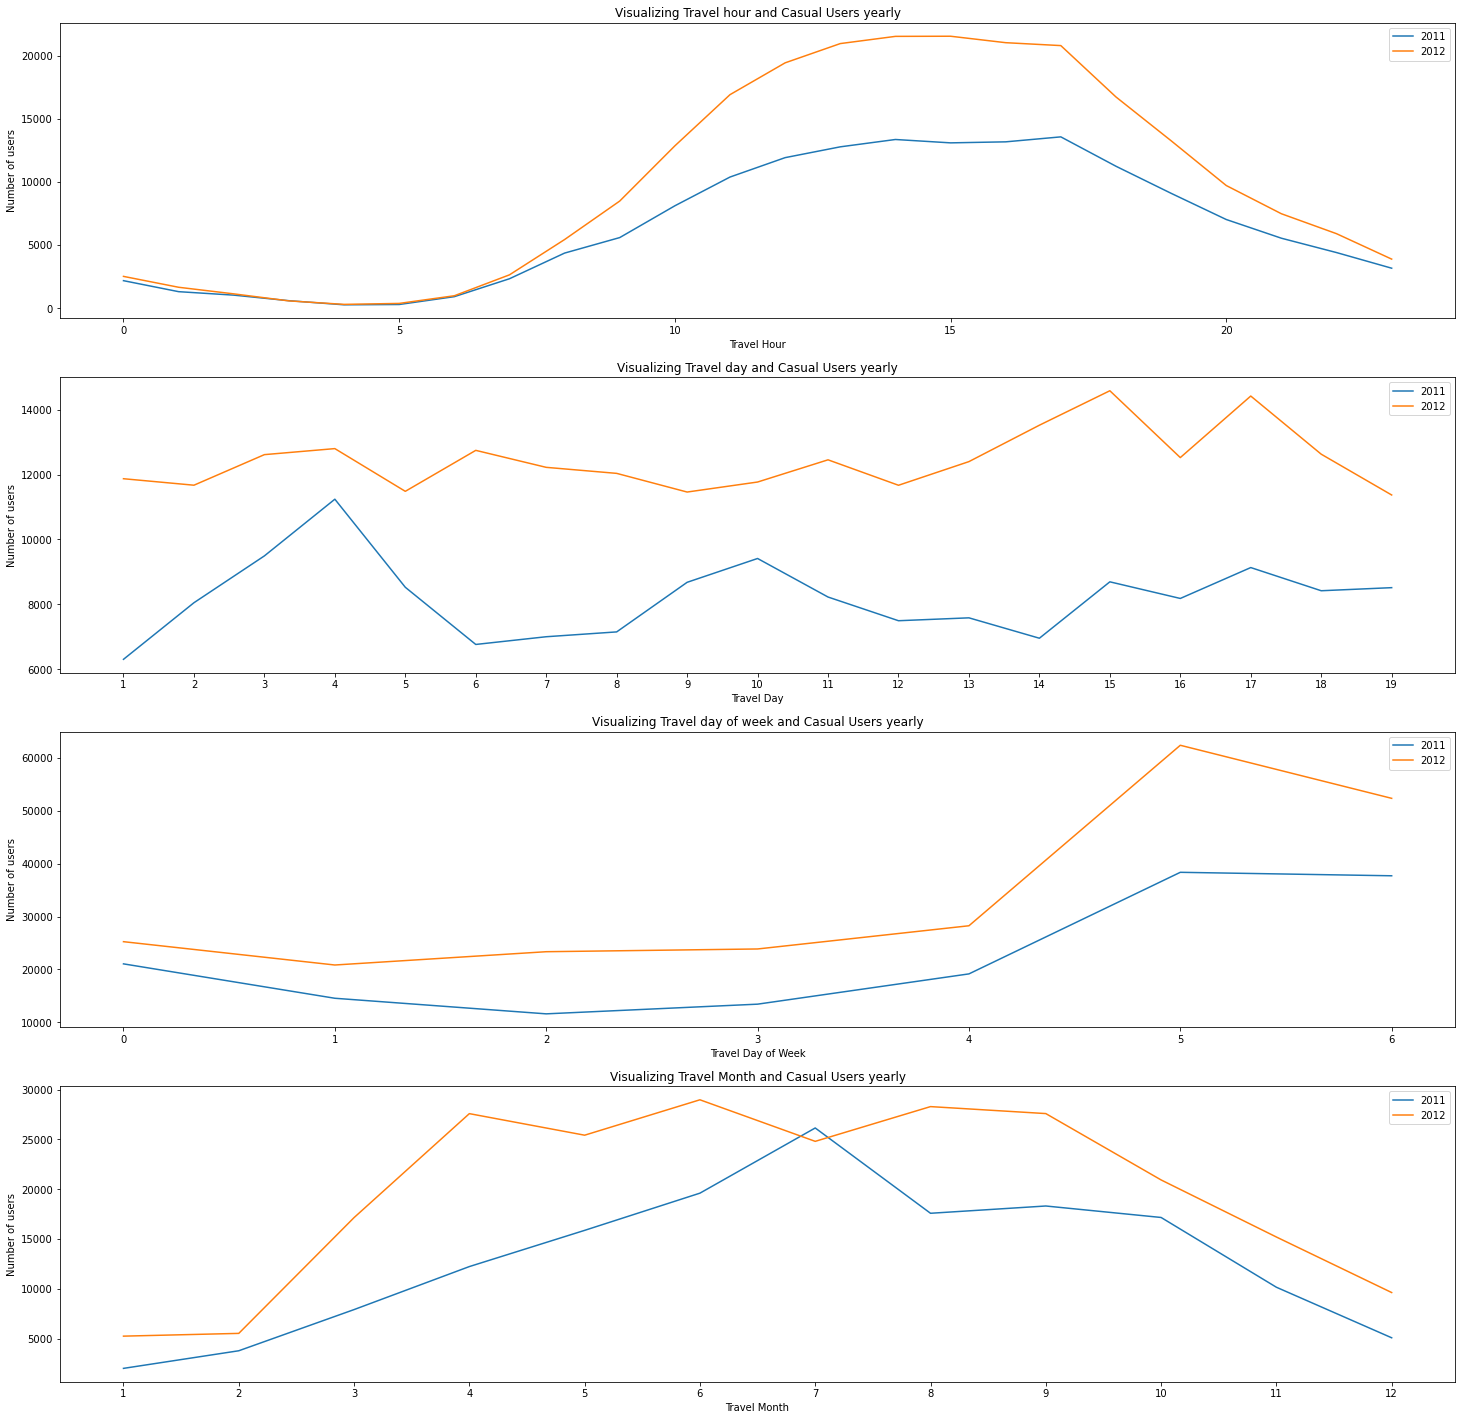

In [45]:
fig , ax = plt.subplots(4,1,figsize=(25,25))

# Travel hour and Causal users : Yearly Comparison

travel_hour_year_casual = df_temp.groupby(["travel_hour",'travel_year'])["casual"].sum().unstack()
sns.lineplot(ax=ax[0],x=travel_hour_year_casual.index,y=travel_hour_year_casual[2011])
sns.lineplot(ax=ax[0],x=travel_hour_year_casual.index,y=travel_hour_year_casual[2012])
ax[0].set_title("Visualizing Travel hour and Casual Users yearly")
ax[0].legend(["2011","2012"])
ax[0].set_ylabel("Number of users")
ax[0].set_xlabel("Travel Hour")

# Travel day and Causal users : Yearly Comparison

travel_day_year_casual = df_temp.groupby(["travel_day",'travel_year'])["casual"].sum().unstack()
sns.lineplot(ax=ax[1],x=travel_day_year_casual.index,y=travel_day_year_casual[2011])
sns.lineplot(ax=ax[1],x=travel_day_year_casual.index,y=travel_day_year_casual[2012])
ax[1].set_title("Visualizing Travel day and Casual Users yearly")
ax[1].legend(["2011","2012"])
ax[1].set_ylabel("Number of users")
ax[1].set_xlabel("Travel Day")
ax[1].set_xticks(range(1,20))

# Travel day of week and Causal users : Yearly Comparison

travel_day_of_week_year_casual = df_temp.groupby(["travel_day_of_week",'travel_year'])["casual"].sum().unstack()
sns.lineplot(ax=ax[2],x=travel_day_of_week_year_casual.index,y=travel_day_of_week_year_casual[2011])
sns.lineplot(ax=ax[2],x=travel_day_of_week_year_casual.index,y=travel_day_of_week_year_casual[2012])
ax[2].set_title("Visualizing Travel day of week and Casual Users yearly")
ax[2].legend(["2011","2012"])
ax[2].set_ylabel("Number of users")
ax[2].set_xlabel("Travel Day of Week")


# Travel month of week and Causal users : Yearly Comparison

travel_month_year_casual = df_temp.groupby(["travel_month",'travel_year'])["casual"].sum().unstack()
sns.lineplot(ax=ax[3],x=travel_month_year_casual.index,y=travel_month_year_casual[2011])
sns.lineplot(ax=ax[3],x=travel_month_year_casual.index,y=travel_month_year_casual[2012])
ax[3].set_title("Visualizing Travel Month and Casual Users yearly")
ax[3].legend(["2011","2012"])
ax[3].set_ylabel("Number of users")
ax[3].set_xlabel("Travel Month")
ax[3].set_xticks(range(1,13))


> The yearly comparison for casual users show, they are more active in travel during day time. They show similar travel pattern when looking at travel day, where as they travel most during weekends. Their travel pattern shows that they peak during June / July and starts declining from there.

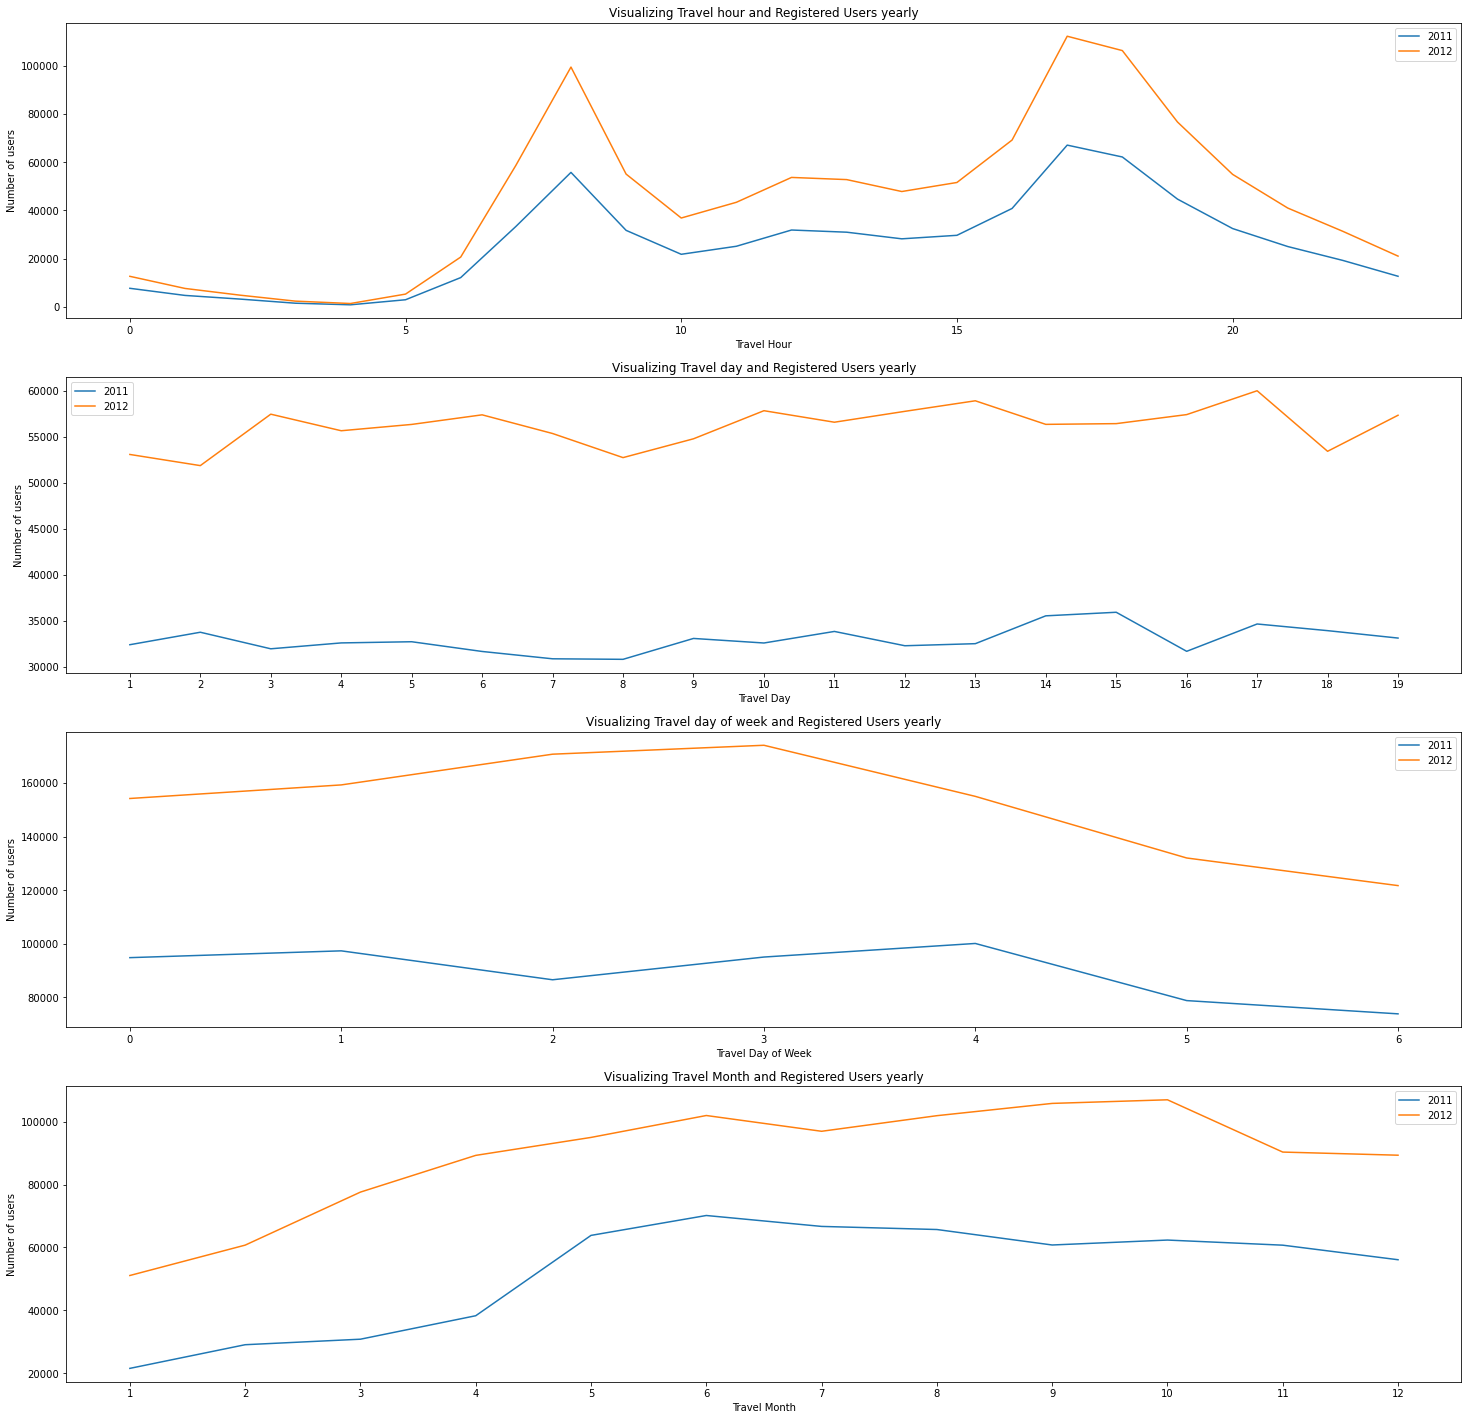

In [46]:
fig , ax = plt.subplots(4,1,figsize=(25,25))

# Travel hour and Registered users : Yearly Comparison

travel_hour_year_casual = df_temp.groupby(["travel_hour",'travel_year'])["registered"].sum().unstack()
sns.lineplot(ax=ax[0],x=travel_hour_year_casual.index,y=travel_hour_year_casual[2011])
sns.lineplot(ax=ax[0],x=travel_hour_year_casual.index,y=travel_hour_year_casual[2012])
ax[0].set_title("Visualizing Travel hour and Registered Users yearly")
ax[0].legend(["2011","2012"])
ax[0].set_ylabel("Number of users")
ax[0].set_xlabel("Travel Hour")

# Travel day and Registered users : Yearly Comparison

travel_day_year_casual = df_temp.groupby(["travel_day",'travel_year'])["registered"].sum().unstack()
sns.lineplot(ax=ax[1],x=travel_day_year_casual.index,y=travel_day_year_casual[2011])
sns.lineplot(ax=ax[1],x=travel_day_year_casual.index,y=travel_day_year_casual[2012])
ax[1].set_title("Visualizing Travel day and Registered Users yearly")
ax[1].legend(["2011","2012"])
ax[1].set_ylabel("Number of users")
ax[1].set_xlabel("Travel Day")
ax[1].set_xticks(range(1,20))

# Travel day of week and Registered users : Yearly Comparison

travel_day_of_week_year_casual = df_temp.groupby(["travel_day_of_week",'travel_year'])["registered"].sum().unstack()
sns.lineplot(ax=ax[2],x=travel_day_of_week_year_casual.index,y=travel_day_of_week_year_casual[2011])
sns.lineplot(ax=ax[2],x=travel_day_of_week_year_casual.index,y=travel_day_of_week_year_casual[2012])
ax[2].set_title("Visualizing Travel day of week and Registered Users yearly")
ax[2].legend(["2011","2012"])
ax[2].set_ylabel("Number of users")
ax[2].set_xlabel("Travel Day of Week")


# Travel month of week and Registered users : Yearly Comparison

travel_month_year_casual = df_temp.groupby(["travel_month",'travel_year'])["registered"].sum().unstack()
sns.lineplot(ax=ax[3],x=travel_month_year_casual.index,y=travel_month_year_casual[2011])
sns.lineplot(ax=ax[3],x=travel_month_year_casual.index,y=travel_month_year_casual[2012])
ax[3].set_title("Visualizing Travel Month and Registered Users yearly")
ax[3].legend(["2011","2012"])
ax[3].set_ylabel("Number of users")
ax[3].set_xlabel("Travel Month")
ax[3].set_xticks(range(1,13))


> The yearly comparison for registered users show more clear pattern. Thus, further justifying our assumption that registered users travel more before and after office hours,the low travels in the weekends also supports our assumption that they might be professionals / students.

In [47]:
print(df_temp.groupby(["season"])['casual'].sum())
print(df_temp.groupby(["season"])['registered'].sum())

season
1     41605
2    129672
3    142718
4     78140
Name: casual, dtype: int64
season
1    270893
2    458610
3    497944
4    465894
Name: registered, dtype: int64


> Both type of users increase their travel activity during season 2-3. We can assume that season 3 is the peak season and travel starts to decline from here.


Text(0.5, 1.0, 'Holiday and Registered Users')

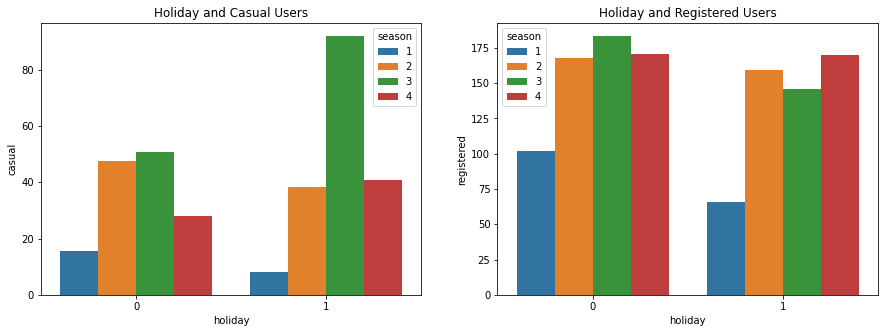

In [48]:
# Analyzing relation between holiday and season and users
fig ,ax = plt.subplots(1,2,figsize=(15,5))
sns.barplot(ax=ax[0],data=df_temp,x="holiday",y="casual",ci=None,hue="season")
ax[0].set_title("Holiday and Casual Users")
sns.barplot(ax=ax[1],data=df_temp,x="holiday",y="registered",ci=None,hue="season")
ax[1].set_title("Holiday and Registered Users")

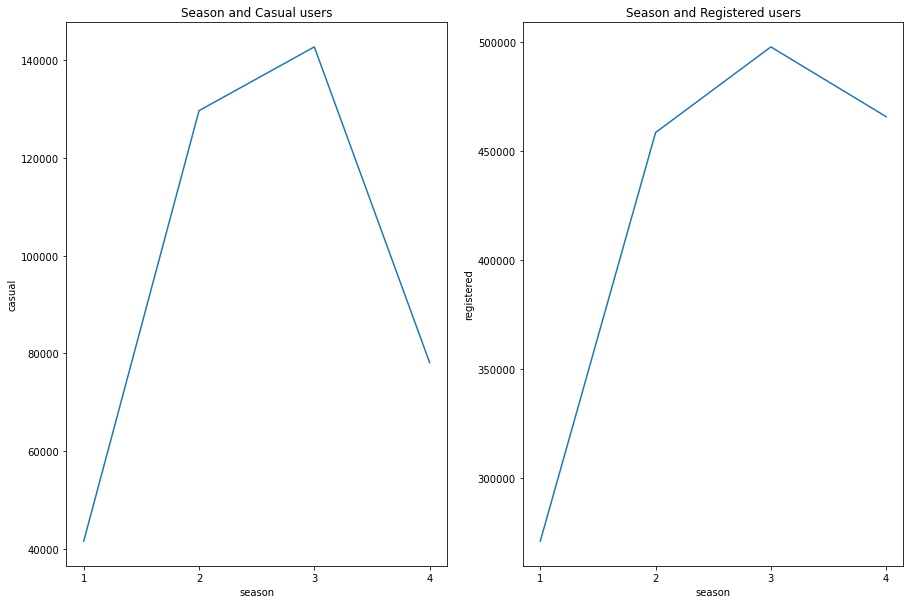

In [49]:
fig,ax = plt.subplots(1,2,figsize=(15,10))
ax[0].set_title("Season and Casual users")
sns.lineplot(ax=ax[0],data=df_temp.groupby(["season"])["casual"].sum())
ax[0].set_xticks([1,2,3,4])
ax[1].set_title("Season and Registered users")
sns.lineplot(ax=ax[1],data=df_temp.groupby(["season"])['registered'].sum())
ax[1].set_xticks([1,2,3,4])

> This shows that travel does indeed peak on season 3 and starts declining from there.

<AxesSubplot:title={'center':'Relationship between Temperature, Weather and Casual users'}, xlabel='temp', ylabel='casual'>

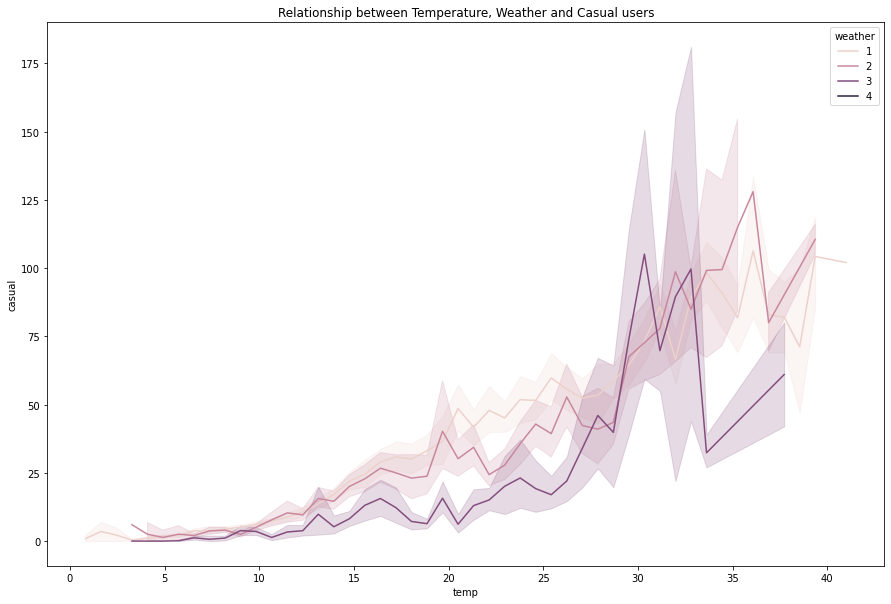

In [50]:
fig, ax=plt.subplots(figsize=(15,10))

#sns.scatterplot(data=df_temp,x="temp",y="casual",hue="weather")
ax.set_title("Relationship between Temperature, Weather and Casual users")

sns.lineplot(data=df_temp,x="temp",y="casual",hue="weather")

> The chart shows us there is increased travel activity of casual users during high temperatures.

Text(0.5, 1.0, 'Relationship between Temperature, Weather and Registered users')

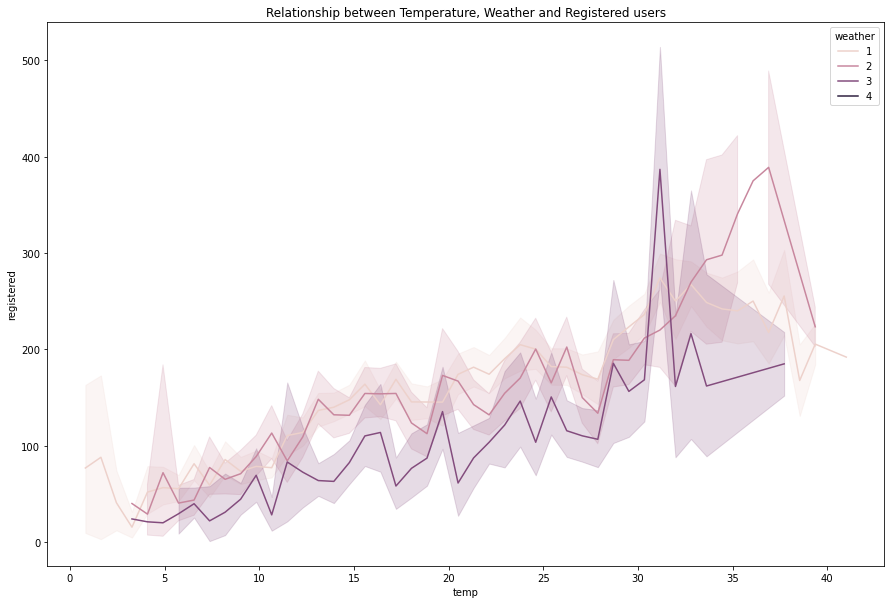

In [51]:
fig, ax=plt.subplots(figsize=(15,10))
sns.lineplot(data=df_temp,x="temp",y="registered",hue="weather")
ax.set_title("Relationship between Temperature, Weather and Registered users")

> Similar to casual users,there is increased travel activity of registered users during high temperatures.

Text(0.5, 1.0, 'Relationship between Weather, Windspeed and Registered users')

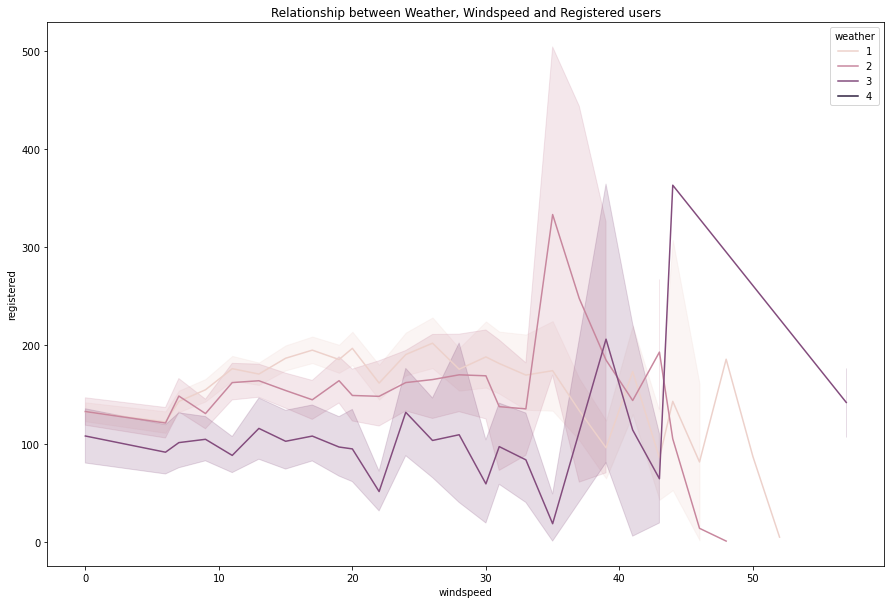

In [52]:
fig, ax=plt.subplots(figsize=(15,10))
sns.lineplot(data=df_temp,x="windspeed",y="registered",hue="weather")
ax.set_title("Relationship between Weather, Windspeed and Registered users")

Text(0.5, 1.0, 'Relationship between Weather, Windspeed and Casual users')

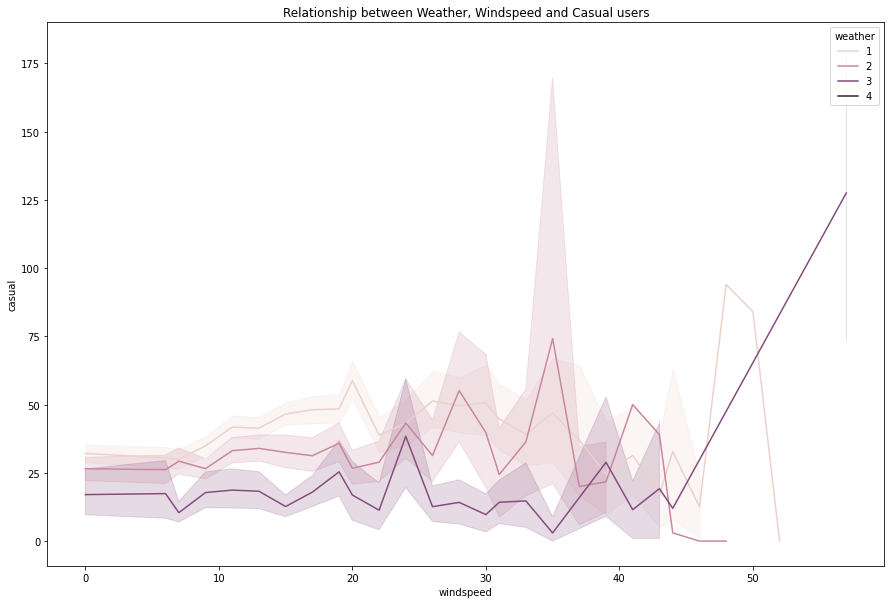

In [53]:
fig, ax=plt.subplots(figsize=(15,10))
sns.lineplot(data=df_temp,x="windspeed",y="casual",hue="weather")
ax.set_title("Relationship between Weather, Windspeed and Casual users")

## Findings 

1. Most registered users travel before and after office hours, which can allows us to ask the question are they Professionals / Students? There does seem to be a similar pattern even in different years.
2. Travel of both type of users starts increasing from season 2 and peaks at season 3 and starts declining.
3. Users travelled in high temperatures, and there were certain spike in travellers during high wind speed.